<a href="https://colab.research.google.com/github/sangwon-cpf20b/nmisp/blob/main/10_root_finding/30_newton_raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell is for the Google Colaboratory
# https://stackoverflow.com/a/63519730
if 'google.colab' in str(get_ipython()):
  # https://colab.research.google.com/notebooks/io.ipynb
  import google.colab.drive as gcdrive
  # may need to visit a link for the Google Colab authorization code
  gcdrive.mount("/content/drive/")
  import sys
  sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/nmisp/10_root_finding")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py



# 뉴튼 랩슨법<br>Newton Rapson Method



10의 제곱근을 구하기 위해 사용했던 함수를 생각해 보자.<br>Let's think about the function that we used to find the square root of 10.



$$
f(x)=x^2-10
$$



In [3]:
# 이 함수를 0으로 만드는 x 를 찾고자 함
# Intend to find x making the function below zero
def f(x):
    return x ** 2 - 10



이 함수는 연속이고 미분 가능하다.<br>This function is continuous and differentiable.



$$
\frac{d}{dx}f\left(x\right)=2x
$$



In [4]:
# 위 함수의 x에 대한 미분
# x-Derivative of the function above
def df_dx(x):
    return 2 * x



그림의 매개변수는 다음과 같이 정하자.<br>
Let's assume plot parameters as follows.



In [5]:
# x 의 범위와 간격을 지정 
# Specify range and interval of x
x_start = -1
x_end = 5
x_interval = 0.5



함수와 기울기를 한번 표시해 보자.<br>Let's visualize the function and the slope.



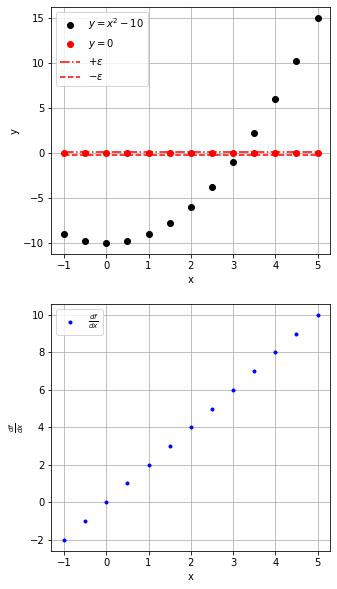

In [6]:
# 그림 관련 확장 기능 준비
# Prepare extension module for plot
import plot_root_finding

# 그림의 크기를 지정
# Specifiy size of the plot
py.figure(figsize=(5, 10))

py.subplot(2, 1, 1)
# 위 명령으로 2행 1열로 그래프를 준비하고 이후의 명령은 첫번째 그래프에 적용
# The command above prepares for sub-plots of two rows and one column and apply following commands to the first graph
x_array = plot_root_finding.plot(f, x_start, x_end, x_interval)

py.subplot(2, 1, 2)
# 이번에는 2행 1열로 그래프 가운데 두번째 그래프에 이후의 명령을 적용
# This time, apply following commands to the second sub-plot of two rows and one column
plot_root_finding.plot_derivative(df_dx, x_array)
py.xlabel('x')
py.ylabel(r'$\frac{df}{dx}$')
py.grid(True)



이를 이용하여, 원하는 위치 $\left(x_i, f(x_i)\right)$ 에서의 접선을 그릴 수 있다.<br>Using this, we can plot tangents at desirable locations of $\left(x_i, f(x_i)\right)$.



$$
y_{tangent}=\left[\frac{d}{dx}f\left(x_i\right)\right] \left(x-x_i \right) + f\left(x_i\right)
$$



위 그림 각 점에서의 접선을 그려 보자.<br>Let's visualize the tangent at each point of the plot above.



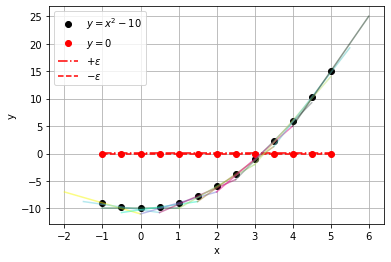

In [7]:
x = plot_root_finding.plot(f, x_start, x_end, x_interval)

plot_root_finding.plot_many_tangents(f, df_dx, x)



기울기가 0이 아니라면, 접선은 $x$축과 만날 것이다. 그 교점의 $x$ 좌표를 $x_j$라 하자.<br>If the slope is not zero, the tangent would intersect with $x$ axis. Let $x_j$ be the $x$ coordinate of the intersection.



$$
\begin{align}
\left[\frac{d}{dx}f\left(x_i\right)\right] \left(x_j-x_i \right) + f\left(x_i\right)=0 \\
\left[\frac{d}{dx}f\left(x_i\right)\right] \left(x_j-x_i \right)=-f\left(x_i\right) \\
\left(x_j-x_i \right)=-\frac{f\left(x_i\right)}{\left[\frac{d}{dx}f\left(x_i\right)\right]} \\
x_j=x_i-\frac{f\left(x_i\right)}{\left[\frac{d}{dx}f\left(x_i\right)\right]} \\
\end{align}
$$



기울기가 0이라면?<br>What if the slope is zero?



$x_i=5$ 지점에서의 접선을 그려 보자.<br>Let's plot tanget at $x_i=5$.



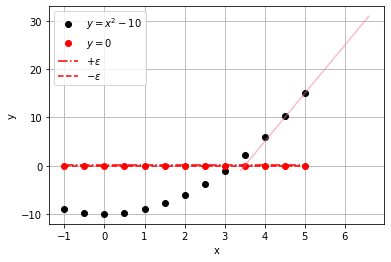

In [8]:
x = plot_root_finding.plot(f, x_start, x_end, x_interval)
x_i = 5
plot_root_finding.plot_one_tangent(f, df_dx, x_i, 0.8)



$x_j$를 한번 계산해 보자.<br>Let's calculate $x_j$, too.



In [9]:
x_j = x_i - f(x_i) / (2 * x_i)



In [10]:
x_j



3.5

여기 $x=x_j$ 에서의 $f(x)$의 값인 $\left. f(x) \right|_{x=x_j}$ 를 계산해 보자.<br>Let's calculate $\left. f(x) \right|_{x=x_j}$, $f(x)$ at $x=x_j$ here.



In [11]:
f(x_j)



2.25

$x_j$ 값은 10의 제곱근에 $x_i$ 보다 가까와졌다.<br> $x_j$ is closer to $\sqrt{10}$ than $x_i$.



$x_i$값을 $x_j$ 값으로 덮어쓰고 한번 더 반복해 보자.<br>Let's iterate once more with $x_j$ as new $x_i$.



In [12]:
previous_x_i = x_i
x_i = x_j



$x_i$ 에서의 접선을 그려 보자.<br>Let's plot tanget at $x_i$.



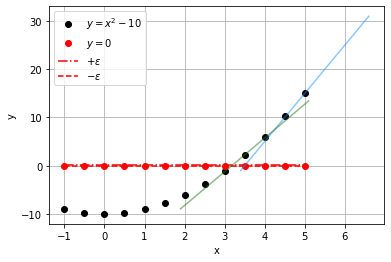

In [13]:
x = plot_root_finding.plot(f, x_start, x_end, x_interval)
plot_root_finding.plot_one_tangent(f, df_dx, previous_x_i, 0.8)
plot_root_finding.plot_one_tangent(f, df_dx, x_i, 0.8)



In [14]:
x_j = x_i - f(x_i) / (2 * x_i)



새로운 $x_j$ :<br>New $x_j$ :



In [15]:
x_j



3.1785714285714284

새로운 $\left. f(x) \right|_{x=x_j}$ :<br>New $\left. f(x) \right|_{x=x_j}$ :



In [16]:
f(x_j)



0.10331632653061185

새로운 $x_j$ 값은 10의 제곱근에 더 가까와졌다.<br>New $x_j$ is even closer to the square root of 10.



## 뉴튼 랩슨법 구현<br>Implementing Newton Raphson Method



매개변수는 다음과 같이 정하자.<br>
Let's set the parameter as follows.



In [17]:
epsilon = 1e-3



$x$ 의 초기값을 지정하자.<br>
Let's specify the initial value of x as follows.



In [18]:
x_initial = 5.0



이 $f(x)$ 값을 0으로 만드는 $x$의 값을 찾고자 하는 것이다.<br>
We want to find the value of $x$ making following $f(x)$ zero.



In [19]:
def f(x):
    return x ** 2 - 10



다시한번, 위 함수를 한번 $x$에 대해 미분하면 다음과 같다.<br>
Again, the first derivative of the function above is as follows.



In [20]:
def df_dx(x):
    return 2 * x



위 반복 계산을 함수로 구현하면 다음과 같다.<br>
Following is an implementation of the iteration steps above.



In [21]:
def newton_raphson(f, df_dx, x_initial, epsilon):
    """
    뉴튼 랩슨 법
    Newton Raphson Method
    
    f : f(x) = 0 을 만족하는 x 를 찾고자 하는 함수 Function that we want to find x satisfying f(x) = 0
    df_dx : f(x) 함수의 x 에 대한 미분 x-derivative of the function above
    x_initial : x의 초기값 Initial value of x
    epsilon : 희망하는 근의 정밀도 Desirable precision of the root
    """
    counter = 0
    
    # 변수 x_i 를 초기화
    # Initialize variable x_i
    x_i = x_initial

    # f(x_i) 의 절대값이 epsilon 보다 더 크다면 계속 반복
    # Iterate while the absolute value of f(x) is larger than epsilon
    while abs(f(x_i)) > epsilon:
        # x_i 지점에서의 접선의 기울기
        # Slope of the tangent at x_i
        slope = df_dx(x_i)
        
        assert abs(slope) > epsilon

        # 접선과 x축의 교점
        # Intersection of the tangent and the x axis
        x_i += - f(x_i) / slope

        counter += 1
    
    print('counter =', counter)
        
    return x_i



10의 제곱근을 찾아보자. 계산 시간도 측정해 보자.<br>
Let's find the square root of 10 while measuring the computation time.



In [22]:
%time sqrt_10 = newton_raphson(f, df_dx, x_initial, epsilon)



counter = 3
CPU times: user 2.22 ms, sys: 19 µs, total: 2.24 ms
Wall time: 1.91 ms


뉴튼 랩슨법으로 찾은 10의 제곱근<br>
Square root of 10 that we just found using the Newton Raphson method :



In [23]:
print('sqrt_10 =', sqrt_10)



sqrt_10 = 3.162319422150883


아래 연산의 결과는 0인가?<br>
Is the result of the following calculation zero?



In [24]:
print('sqrt_10 ** 2 - 10 =', sqrt_10 ** 2 - 10)



sqrt_10 ** 2 - 10 = 0.00026412771269335167


## 연습 문제<br>Exercises



도전과제 1 : $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$ 를 풀기 위한 python 함수 `f1(theta_deg)` 를 구현하고 적당한 $\theta^{\circ}$ 구간에 그 그래프를 그려보시오.<br>
Try this 1 : Implement a python function `f1(theta_deg)` to solve $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$ and plot it over an appropriate interval of $\theta^{\circ}$.



도전과제 2 : 위 `f1(theta_deg)` 함수의 $\theta$에 대한 미분을 python 함수 `df1(theta_deg)` 로 구현하고 그 그래프를 그려 보시오. 위 `f1(theta_deg)` 함수의 기울기가 0인 점에서 `df1(theta_deg)` 함수값이 0인지 확인하시오.<br>
Try this 2 : Implement another python function `df1(theta_deg)` that is a derivative of the function `f1(theta_deg)` over $\theta$ and plot it. Verify whether the value of `df1(theta_deg)` is zero if the slope of the `f1(theta_deg)` is zero.



도전 과제 3 : $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$ 인 $\theta^{\circ}$를 뉴튼 랩슨법으로 구해 보시오.<br>
Try this 3 : Find $\theta^{\circ}$ satisfying $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$ using the Newton's method.



도전 과제 4 : 초기 $\theta$ 값을 정할 때 주의해야 하는 까닭은?<br>
Try this 4 : Why do we have to be careful when choosing initial $\theta$?



도전 과제 5: 관심 있는 $f(x)=0$ 문제를 정하여 뉴튼-랩슨법으로 근을 구해 보시오.<br>
Try this 5: Find a root of a $f(x)=0$ problem of your choice using the Newton-Raphson method.



## 사이파이 구현<br>Implementation in SciPy



사이파이 모듈에도 [`newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 함수가 있다.<br>
The SciPy module also has the [`newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) function.



In [25]:
import scipy.optimize as so



In [26]:
%time sqrt_10_scipy = so.newton(f, x_initial, fprime=df_dx, tol=epsilon)



CPU times: user 0 ns, sys: 657 µs, total: 657 µs
Wall time: 690 µs


In [27]:
sqrt_10_scipy



3.1622776604441363

앞에서 구한 값과 비교해 보자.<br>Let's compare with the previous value.



In [28]:
sqrt_10



3.162319422150883

결과 확인<br>Check result



In [29]:
import math
assert math.isclose((sqrt_10_scipy ** 2), 10.0, abs_tol=epsilon), (sqrt_10_scipy ** 2)



## Final Bell<br>마지막 종



In [30]:
# stackoverfow.com/a/24634221
import os
os.system("printf '\a'");

